## Figuring out what we are looking for focusing specifically on spike time info.

In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache

In [6]:
data_dir = "./allendata"

manifest_path = os.path.join(data_dir, "manifest.json")
cache = EcephysProjectCache.from_warehouse(manifest=manifest_path)
sessions = cache.get_session_table()

In [7]:
id = 750332458
session = cache.get_session_data(id)

c:\Users\georg\anaconda3\Anaconda1\envs\neuroscience_project\Lib\site-packages\hdmf\spec\namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.1.3 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
c:\Users\georg\anaconda3\Anaconda1\envs\neuroscience_project\Lib\site-packages\hdmf\spec\namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.2.2 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


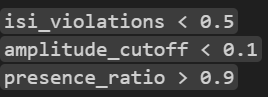

These are the quality metrics we should impliment in the functions in dataset.py at some point. (the default ones used by allen)

For now this notebook is manually adding (isi_violations < 0.5) but does nothing about other two.

In [8]:
session.units["ecephys_structure_acronym"].value_counts()

c:\Users\georg\anaconda3\Anaconda1\envs\neuroscience_project\Lib\site-packages\hdmf\spec\namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.1.3 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
c:\Users\georg\anaconda3\Anaconda1\envs\neuroscience_project\Lib\site-packages\hdmf\spec\namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.2.2 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
c:\Users\georg\anaconda3\Anaconda1\envs\neuroscience_project\Lib\site-packages\hdmf\spec\namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.1.3 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
c:\Users\georg\anaconda3\Anaconda1\envs\neuroscience_project\Lib\site-packages\hdmf\spec\namesp

grey     558
VISal     71
VISp      63
VISam     60
VISrl     44
VISl      38
VISpm     19
CA1       16
CA3       15
DG         7
IGL        5
LGd        4
IntG       2
Name: ecephys_structure_acronym, dtype: int64

In [9]:
table_static = session.get_stimulus_table("static_gratings")

table_static.head()

c:\Users\georg\anaconda3\Anaconda1\envs\neuroscience_project\Lib\site-packages\hdmf\spec\namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.1.3 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
c:\Users\georg\anaconda3\Anaconda1\envs\neuroscience_project\Lib\site-packages\hdmf\spec\namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.2.2 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


,stimulus_block,start_time,stop_time,contrast,phase,stimulus_name,size,spatial_frequency,orientation,duration,stimulus_condition_id
stimulus_presentation_id,,,,,,,,,,,
49434,8.0,5398.833208,5399.083416,0.8,0.25,static_gratings,"[250.0, 250.0]",0.04,0.0,0.250209,4787
49435,8.0,5399.083416,5399.333625,0.8,0.0,static_gratings,"[250.0, 250.0]",0.32,0.0,0.250209,4788
49436,8.0,5399.333625,5399.583834,0.8,0.0,static_gratings,"[250.0, 250.0]",0.04,30.0,0.250209,4789
49437,8.0,5399.583834,5399.834042,0.8,0.75,static_gratings,"[250.0, 250.0]",0.08,90.0,0.250209,4790
49438,8.0,5399.834042,5400.084249,0.8,0.25,static_gratings,"[250.0, 250.0]",0.08,60.0,0.250206,4791


In [10]:
table_drifting = session.get_stimulus_table("drifting_gratings")

table_drifting.head()

,stimulus_block,start_time,stop_time,contrast,phase,temporal_frequency,stimulus_name,size,spatial_frequency,orientation,duration,stimulus_condition_id
stimulus_presentation_id,,,,,,,,,,,,
3798,2.0,1585.647748,1587.649398,0.8,"[21235.93333333, 21235.93333333]",4.0,drifting_gratings,"[250.0, 250.0]",0.04,180.0,2.00165,246
3799,2.0,1588.650242,1590.651902,0.8,"[21235.93333333, 21235.93333333]",4.0,drifting_gratings,"[250.0, 250.0]",0.04,225.0,2.00166,247
3800,2.0,1591.652728,1593.654418,0.8,"[21235.93333333, 21235.93333333]",2.0,drifting_gratings,"[250.0, 250.0]",0.04,135.0,2.00169,248
3801,2.0,1594.655252,1596.656912,0.8,"[21235.93333333, 21235.93333333]",2.0,drifting_gratings,"[250.0, 250.0]",0.04,0.0,2.00166,249
3802,2.0,1597.657758,1599.659418,0.8,"[21235.93333333, 21235.93333333]",15.0,drifting_gratings,"[250.0, 250.0]",0.04,315.0,2.00166,250


In [11]:
def get_spike(session, stimuli, ecephys_structure_acronym):

    table = session.get_stimulus_table(stimuli)


    stimulus_presentation_ids = table.index.values
    unit_ids = session.units[session.units["ecephys_structure_acronym"] == ecephys_structure_acronym].index.values

    spike_counts = session.conditionwise_spike_statistics(
        stimulus_presentation_ids=stimulus_presentation_ids,
        unit_ids =unit_ids,
    )
 
    return spike_counts

In [12]:
static_spike_counts_VISam = get_spike(session, stimuli = "static_gratings", ecephys_structure_acronym="VISam")

In [13]:
static_spike_counts_VISam.head()

,,spike_count,stimulus_presentation_count,spike_mean,spike_std,spike_sem
unit_id,stimulus_condition_id,,,,,
951819523,4787,21,49,0.428571,1.040833,0.148690
951819532,4787,35,49,0.714286,0.707107,0.101015
951819541,4787,86,49,1.755102,1.774009,0.253430
951819550,4787,41,49,0.836735,1.650088,0.235727
951819732,4787,233,49,4.755102,2.250283,0.321469


The dataframe gives information on the spikes of units. These units are indexed by their id and also the stimulus condition for which they generated this spike data (multi-index).

In [14]:
# Static spike counts for VISp DG LP and APN

static_spike_counts_VISp = get_spike(session, stimuli = "static_gratings", ecephys_structure_acronym="VISp")
static_spike_counts_DG = get_spike(session, stimuli = "static_gratings", ecephys_structure_acronym="DG")
static_spike_counts_LGd = get_spike(session, stimuli = "static_gratings", ecephys_structure_acronym="LGd")

# Drifting spike counts for VISam VISp DG LP and APN

drifting_spike_counts_VISam = get_spike(session, stimuli = "drifting_gratings", ecephys_structure_acronym="VISam")
drifting_spike_counts_VISp = get_spike(session, stimuli = "drifting_gratings", ecephys_structure_acronym="VISp")
drifting_spike_counts_DG = get_spike(session, stimuli = "drifting_gratings", ecephys_structure_acronym="DG")
drifting_spike_counts_LGd = get_spike(session, stimuli = "drifting_gratings", ecephys_structure_acronym="LGd")

Looking at .head() it seems that in all regions the spike_mean increases when we switch to drifting_gratings as stimulus. Moreover, the spike_mean seems to be higher in DG and LGd than the two in the visual cortex. 

In [15]:
static_spike_counts_VISam.shape

(7260, 5)

In [16]:
static_spike_counts_DG.shape

(847, 5)

In [17]:
static_spike_counts_LGd.shape

(484, 5)

Many different paths the project could take/ Looking at overlapping units/all units/comparing regions/comparing stimulus conditions. 

I will begin by comparing the spike_mean and spike_CV for all units across the brain regions identified so far in different cortices (VISp, VISam, DG, LGd). Not overlapping and all units for all different type of stimuli. 

C:\Users\georg\AppData\Local\Temp\ipykernel_12904\3622108540.py:28: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(boxplot_data, patch_artist=True, labels=['Static', 'Drifting'])


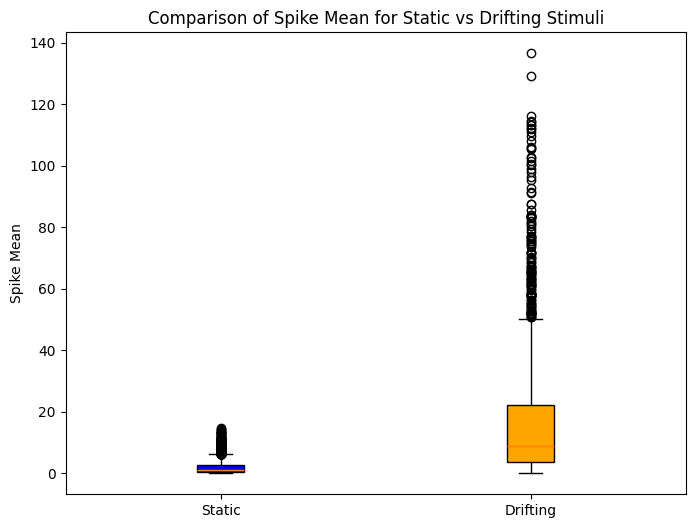

In [18]:
import matplotlib.pyplot as plt

def plot_spike_means(static_df, drifting_df):
    """
    Create a colored box plot comparing the spike_mean values for static and drifting stimuli.

    Parameters:
    -----------
    static_df : pandas.DataFrame
        DataFrame with static stimulus spike count statistics, which must include the column 'spike_mean'.
    drifting_df : pandas.DataFrame
        DataFrame with drifting stimulus spike count statistics, which must include the column 'spike_mean'.

    Returns:
    --------
    fig : matplotlib.figure.Figure
        The figure object containing the box plot.
    """
    # Extract the 'spike_mean' column from each dataframe.
    static_spike_means = static_df['spike_mean']
    drifting_spike_means = drifting_df['spike_mean']

    # Set up the figure and axes for the box plot.
    fig, ax = plt.subplots(figsize=(8, 6))

    # Create the box plot with patch_artist=True to allow coloring.
    boxplot_data = [static_spike_means, drifting_spike_means]
    bp = ax.boxplot(boxplot_data, patch_artist=True, labels=['Static', 'Drifting'])

    # Set the face color of each box:
    colors = ['blue', 'orange']
    for box, color in zip(bp['boxes'], colors):
        box.set_facecolor(color)

    # Add labels and title to the plot.
    ax.set_ylabel('Spike Mean')
    ax.set_title('Comparison of Spike Mean for Static vs Drifting Stimuli')

    plt.show()


plot_spike_means(static_spike_counts_VISam, drifting_spike_counts_VISam)

C:\Users\georg\AppData\Local\Temp\ipykernel_12904\3622108540.py:28: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(boxplot_data, patch_artist=True, labels=['Static', 'Drifting'])


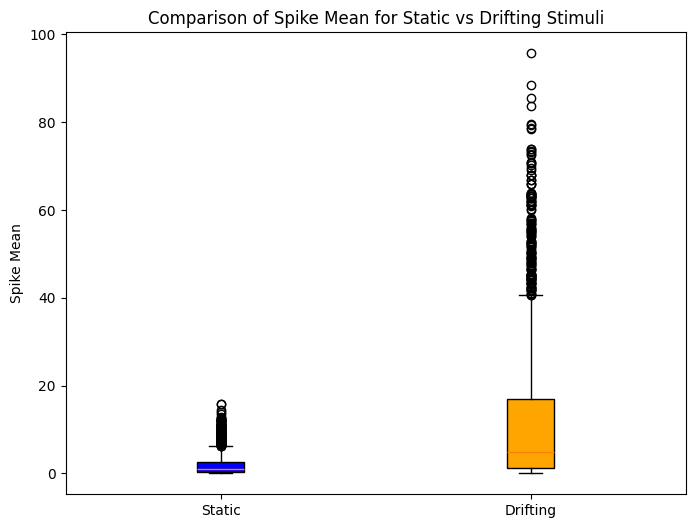

In [19]:
plot_spike_means(static_spike_counts_VISp, drifting_spike_counts_VISp)

C:\Users\georg\AppData\Local\Temp\ipykernel_12904\3622108540.py:28: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(boxplot_data, patch_artist=True, labels=['Static', 'Drifting'])


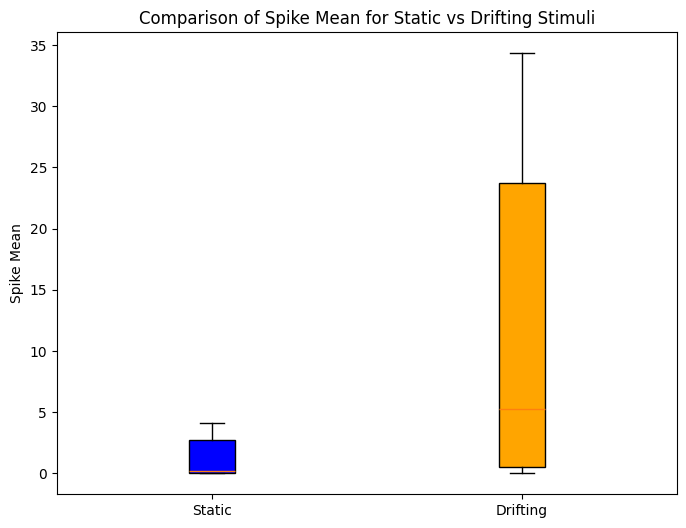

In [20]:
plot_spike_means(static_spike_counts_DG, drifting_spike_counts_DG)

C:\Users\georg\AppData\Local\Temp\ipykernel_12904\3622108540.py:28: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(boxplot_data, patch_artist=True, labels=['Static', 'Drifting'])


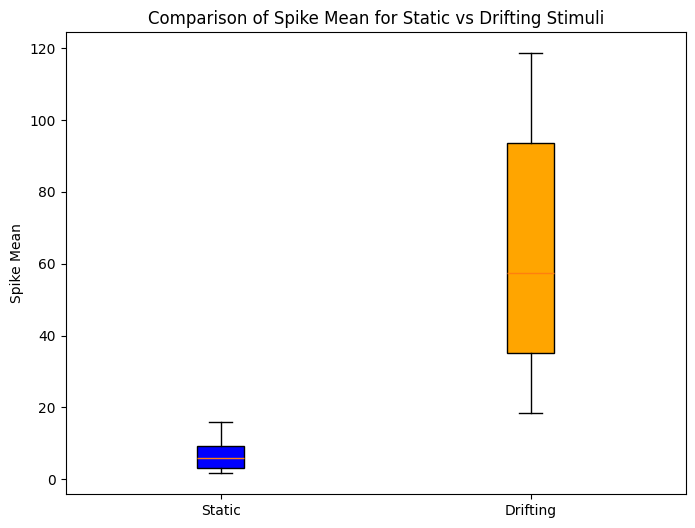

In [21]:
plot_spike_means(static_spike_counts_LGd, drifting_spike_counts_LGd)

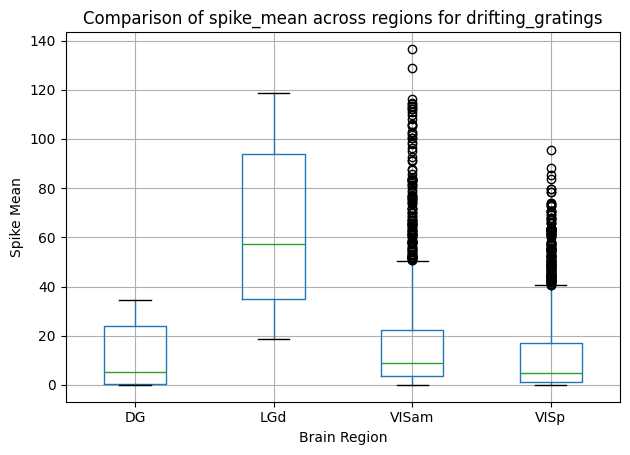

In [43]:
def spike_mean_by_region(session, regions, stimulus):
    """
    A function to compare spike_means = spike_count / number of presentations
    across different brain regions.
    
    Parameters
    ----------
    session: 
        A session object.
    regions: list of str
        A list of the region acronyms, e.g. ['VISp', 'VISam', 'DG'].
    stimulus: str
        A stimulus name, e.g. "drifting_gratings".
    """

    # Collect data from each region in a list of DataFrames
    df_list = []
    for region in regions:
        # Get spikes for the given region and stimulus
        subdf = get_spike(session, stimuli=stimulus, ecephys_structure_acronym=region)
        # Label this subset with the region name
        subdf["region"] = region
        df_list.append(subdf)

    # Combine all region data into a single DataFrame
    df = pd.concat(df_list, ignore_index=True)

    # Create a boxplot of spike_mean across all regions
    fig, ax = plt.subplots()
    df.boxplot(column="spike_mean", by="region", ax=ax)

    # Set plot labels and titles
    ax.set_title(f"Comparison of spike_mean across regions for {stimulus}")
    ax.set_xlabel("Brain Region")
    ax.set_ylabel("Spike Mean")
    plt.suptitle("")  # Remove the default title that Pandas boxplot adds
    plt.tight_layout()
    plt.show()

regions = ['VISp', 'VISam', 'DG', 'LGd']
spike_mean_by_region(session, regions, 'drifting_gratings')


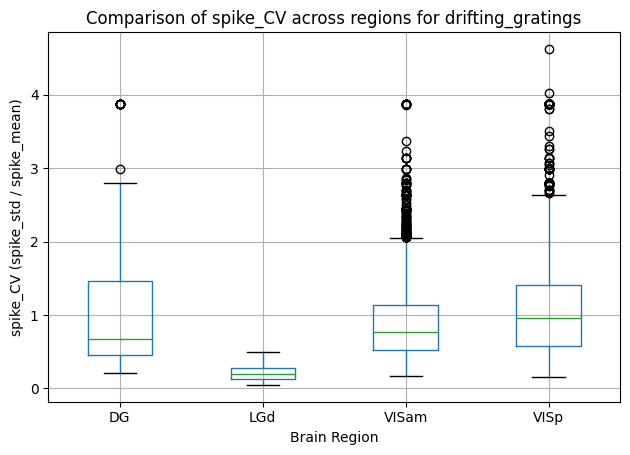

In [44]:
def spike_cv_by_region(session, regions, stimulus):
    """
    A function to compare spike_CV (coefficient of variation) = spike_std / spike_mean
    across different brain regions.
    
    Parameters
    ----------
    session:
        A session object.
    regions: list of str
        A list of the region acronyms, e.g. ['VISp', 'VISam', 'DG'].
    stimulus: str
        A stimulus name, e.g. "drifting_gratings".
    """
    df_list = []
    for region in regions:
        # Get spike data for the given region and stimulus
        subdf = get_spike(session, stimuli=stimulus, ecephys_structure_acronym=region)
        # Compute spike_CV = spike_std / spike_mean
        subdf["spike_CV"] = subdf["spike_std"] / subdf["spike_mean"]
        # Label this subset with the region name
        subdf["region"] = region
        df_list.append(subdf)

    # Combine data from all regions into a single DataFrame
    df = pd.concat(df_list, ignore_index=True)

    # Create a boxplot of spike_CV across all regions
    fig, ax = plt.subplots()
    df.boxplot(column="spike_CV", by="region", ax=ax)

    # Set plot labels and titles
    ax.set_title(f"Comparison of spike_CV across regions for {stimulus}")
    ax.set_xlabel("Brain Region")
    ax.set_ylabel("spike_CV (spike_std / spike_mean)")
    plt.suptitle("")  # Remove the default title that Pandas boxplot adds
    plt.tight_layout()
    plt.show()

spike_cv_by_region(session, regions, 'drifting_gratings')

In all regions there is a clear difference between static and drifting stimuli. Moreover, some cool differences for a specific stimulus between different brain regions. VISp abd VISam seem similar but the rest not.

Now I want to investigate the different stimulus conditions for drifting gratings.

In [22]:
unique_conditions = drifting_spike_counts_VISam.index.get_level_values("stimulus_condition_id").unique()
print("Number of unique stimulus_condition_id values:", len(unique_conditions))
print(unique_conditions)

Number of unique stimulus_condition_id values: 41
Int64Index([246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258,
            259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271,
            272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284,
            285, 286],
           dtype='int64', name='stimulus_condition_id')


Should have 40 (corresponding to 8 orientations and 5 temporal frequencies).

In [23]:
drifting_spike_counts_VISam.head()

,,spike_count,stimulus_presentation_count,spike_mean,spike_std,spike_sem
unit_id,stimulus_condition_id,,,,,
951819523,246,147,15,9.800000,9.412757,2.430363
951819532,246,202,15,13.466667,18.212502,4.702448
951819541,246,129,15,8.600000,5.315745,1.372519
951819550,246,50,15,3.333333,5.246314,1.354592
951819732,246,793,15,52.866667,30.258096,7.812607


I want to select the first unit and then go into individual spike data on it. Hopefully I am able to distinguish the type of stimulus. Note a difference between stimulus_presentation_id and stimulus_condition_id.

In [24]:
stimulus_presentations = session.stimulus_presentations
stimulus_presentations.head()

,stimulus_block,start_time,stop_time,y_position,contrast,frame,phase,temporal_frequency,color,stimulus_name,size,spatial_frequency,orientation,x_position,duration,stimulus_condition_id
stimulus_presentation_id,,,,,,,,,,,,,,,,
0,null,24.343718,84.410468,null,null,null,null,null,null,spontaneous,null,null,null,null,60.066750,0
1,0.0,84.410468,84.643989,20.0,0.8,null,"[3644.93333333, 3644.93333333]",4.0,null,gabors,"[20.0, 20.0]",0.08,90.0,0.0,0.233521,1
2,0.0,84.643989,84.894190,-10.0,0.8,null,"[3644.93333333, 3644.93333333]",4.0,null,gabors,"[20.0, 20.0]",0.08,90.0,20.0,0.250201,2
3,0.0,84.894190,85.144391,-10.0,0.8,null,"[3644.93333333, 3644.93333333]",4.0,null,gabors,"[20.0, 20.0]",0.08,45.0,-30.0,0.250201,3
4,0.0,85.144391,85.394592,30.0,0.8,null,"[3644.93333333, 3644.93333333]",4.0,null,gabors,"[20.0, 20.0]",0.08,0.0,40.0,0.250201,4


In [25]:
drifting_stimulus_presentations = stimulus_presentations[
    stimulus_presentations['stimulus_name'] == 'drifting_gratings'
]
drifting_stimulus_presentations.head()

,stimulus_block,start_time,stop_time,y_position,contrast,frame,phase,temporal_frequency,color,stimulus_name,size,spatial_frequency,orientation,x_position,duration,stimulus_condition_id
stimulus_presentation_id,,,,,,,,,,,,,,,,
3798,2.0,1585.647748,1587.649398,null,0.8,null,"[21235.93333333, 21235.93333333]",4.0,null,drifting_gratings,"[250.0, 250.0]",0.04,180.0,null,2.00165,246
3799,2.0,1588.650242,1590.651902,null,0.8,null,"[21235.93333333, 21235.93333333]",4.0,null,drifting_gratings,"[250.0, 250.0]",0.04,225.0,null,2.00166,247
3800,2.0,1591.652728,1593.654418,null,0.8,null,"[21235.93333333, 21235.93333333]",2.0,null,drifting_gratings,"[250.0, 250.0]",0.04,135.0,null,2.00169,248
3801,2.0,1594.655252,1596.656912,null,0.8,null,"[21235.93333333, 21235.93333333]",2.0,null,drifting_gratings,"[250.0, 250.0]",0.04,0.0,null,2.00166,249
3802,2.0,1597.657758,1599.659418,null,0.8,null,"[21235.93333333, 21235.93333333]",15.0,null,drifting_gratings,"[250.0, 250.0]",0.04,315.0,null,2.00166,250


In [26]:
drifting_stimulus_presentations.shape

(630, 16)

In [27]:
drifting_stimulus_presentations['orientation'].unique()

array([180.0, 225.0, 135.0, 0.0, 315.0, 90.0, 270.0, 'null', 45.0],
      dtype=object)

In [28]:
df = drifting_stimulus_presentations[drifting_stimulus_presentations['orientation'] == 'null']
df.head()

,stimulus_block,start_time,stop_time,y_position,contrast,frame,phase,temporal_frequency,color,stimulus_name,size,spatial_frequency,orientation,x_position,duration,stimulus_condition_id
stimulus_presentation_id,,,,,,,,,,,,,,,,
3820,2.0,1651.702918,1653.704558,null,null,null,"[21235.93333333, 21235.93333333]",null,null,drifting_gratings,"[250.0, 250.0]",null,null,null,2.00164,265
3830,2.0,1681.728018,1683.729698,null,null,null,"[21235.93333333, 21235.93333333]",null,null,drifting_gratings,"[250.0, 250.0]",null,null,null,2.00168,265
3885,2.0,1846.865952,1848.867622,null,null,null,"[21235.93333333, 21235.93333333]",null,null,drifting_gratings,"[250.0, 250.0]",null,null,null,2.00167,265
3918,2.0,1945.948738,1947.950398,null,null,null,"[21235.93333333, 21235.93333333]",null,null,drifting_gratings,"[250.0, 250.0]",null,null,null,2.00166,265
3938,2.0,2005.998908,2008.000538,null,null,null,"[21235.93333333, 21235.93333333]",null,null,drifting_gratings,"[250.0, 250.0]",null,null,null,2.00163,265


Note we have this 'null' orientation, not sure what it means but all the other values seem to be null. Also note that it has stimulus_condition_id = 265.

For now I want to fix the orientation and find some stimulus_condition_id's such that the temporal frequency varies.

In [29]:
drifting_s_p_00 = drifting_stimulus_presentations[drifting_stimulus_presentations['orientation'] == 0.0]
drifting_s_p_00.head()

,stimulus_block,start_time,stop_time,y_position,contrast,frame,phase,temporal_frequency,color,stimulus_name,size,spatial_frequency,orientation,x_position,duration,stimulus_condition_id
stimulus_presentation_id,,,,,,,,,,,,,,,,
3801,2.0,1594.655252,1596.656912,null,0.8,null,"[21235.93333333, 21235.93333333]",2.0,null,drifting_gratings,"[250.0, 250.0]",0.04,0.0,null,2.00166,249
3815,2.0,1636.690362,1638.692042,null,0.8,null,"[21235.93333333, 21235.93333333]",1.0,null,drifting_gratings,"[250.0, 250.0]",0.04,0.0,null,2.00168,261
3816,2.0,1639.692928,1641.694568,null,0.8,null,"[21235.93333333, 21235.93333333]",15.0,null,drifting_gratings,"[250.0, 250.0]",0.04,0.0,null,2.00164,262
3822,2.0,1657.707938,1659.709588,null,0.8,null,"[21235.93333333, 21235.93333333]",15.0,null,drifting_gratings,"[250.0, 250.0]",0.04,0.0,null,2.00165,262
3834,2.0,1693.738078,1695.739718,null,0.8,null,"[21235.93333333, 21235.93333333]",8.0,null,drifting_gratings,"[250.0, 250.0]",0.04,0.0,null,2.00164,269


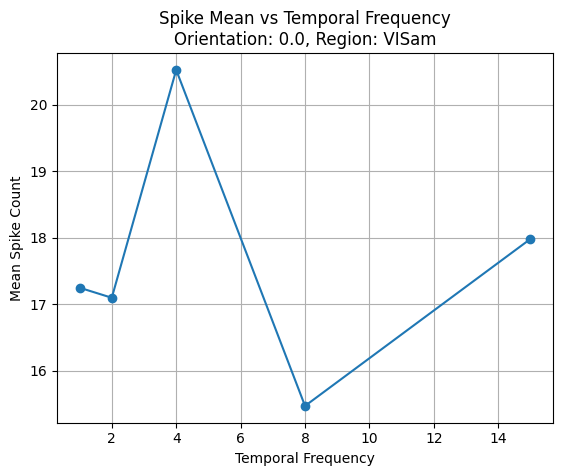

In [30]:
import matplotlib.pyplot as plt
import pandas as pd

def spike_mean_mean_temporal_frequency(session, region, orientation):
    # Filter stimulus presentations for drifting gratings
    stimulus_presentations = session.stimulus_presentations
    drifting_stimulus_presentations = stimulus_presentations[
        stimulus_presentations['stimulus_name'] == 'drifting_gratings'
    ]
    
    # Further filter by the specified orientation
    drifting_orientation = drifting_stimulus_presentations[
        drifting_stimulus_presentations['orientation'] == orientation
    ]
    
    # Retrieve spike counts for drifting gratings from the specified region
    drifting_spike_counts = get_spike(session, stimuli="drifting_gratings", 
                                      ecephys_structure_acronym=region)
    
    # Determine the linking column in the spike counts DataFrame.
    # It might be 'stimulus_condition_id' or 'stimulus_presentation_id'.
    # Check if they exist as a column; if not, check if they are part of the index.
    if 'stimulus_condition_id' in drifting_spike_counts.columns:
        link_column = 'stimulus_condition_id'
    elif 'stimulus_presentation_id' in drifting_spike_counts.columns:
        link_column = 'stimulus_presentation_id'
    else:
        # If not in columns, check if it's in the index names
        if drifting_spike_counts.index.names and 'stimulus_condition_id' in drifting_spike_counts.index.names:
            link_column = 'stimulus_condition_id'
            drifting_spike_counts = drifting_spike_counts.reset_index(level=link_column)
        elif drifting_spike_counts.index.names and 'stimulus_presentation_id' in drifting_spike_counts.index.names:
            link_column = 'stimulus_presentation_id'
            drifting_spike_counts = drifting_spike_counts.reset_index(level=link_column)
        else:
            raise ValueError("Neither 'stimulus_condition_id' nor 'stimulus_presentation_id' found in spike counts.")

    # Apply similar logic for drifting_orientation DataFrame to get the mapping column.
    if 'stimulus_condition_id' in drifting_orientation.columns:
        mapping_col = 'stimulus_condition_id'
    elif 'stimulus_presentation_id' in drifting_orientation.columns:
        mapping_col = 'stimulus_presentation_id'
    else:
        if drifting_orientation.index.names and 'stimulus_condition_id' in drifting_orientation.index.names:
            mapping_col = 'stimulus_condition_id'
            drifting_orientation = drifting_orientation.reset_index(level=mapping_col)
        elif drifting_orientation.index.names and 'stimulus_presentation_id' in drifting_orientation.index.names:
            mapping_col = 'stimulus_presentation_id'
            drifting_orientation = drifting_orientation.reset_index(level=mapping_col)
        else:
            raise ValueError("Neither 'stimulus_condition_id' nor 'stimulus_presentation_id' found in stimulus presentations.")

    # Create a mapping from the linking column to temporal_frequency
    freq_mapping = drifting_orientation[[mapping_col, 'temporal_frequency']].drop_duplicates() \
                   .set_index(mapping_col)['temporal_frequency'].to_dict()

    # Map temporal_frequency into the drifting_spike_counts DataFrame using the linking column
    drifting_spike_counts['temporal_frequency'] = drifting_spike_counts[link_column].map(freq_mapping)
    
    # Drop rows that couldn’t be mapped (if any)
    drifting_spike_counts = drifting_spike_counts.dropna(subset=['temporal_frequency'])
    
    # Group the spike counts by temporal_frequency and compute the mean spike count (assuming the value column is 'spike_mean')
    mean_spike_by_freq = drifting_spike_counts.groupby('temporal_frequency')['spike_mean'].mean().reset_index()
    
    # Plot the results: y-axis is the mean spike count, x-axis is the temporal frequency.
    plt.figure()
    plt.plot(mean_spike_by_freq['temporal_frequency'], mean_spike_by_freq['spike_mean'], marker='o')
    plt.xlabel('Temporal Frequency')
    plt.ylabel('Mean Spike Count')
    plt.title(f"Spike Mean vs Temporal Frequency\nOrientation: {orientation}, Region: {region}")
    plt.grid(True)
    plt.show()


spike_mean_mean_temporal_frequency(session, "VISam", 0.0)

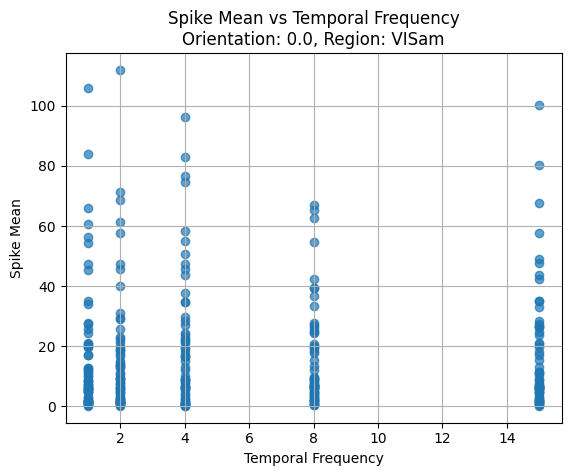

In [31]:
import matplotlib.pyplot as plt
import pandas as pd

def spike_mean_temporal_frequency(session, region, orientation):
    """Guide
    
    Function returns a plot of the spike_mean's of units in a specified region for a specified orintation of DRIFTING gratings for various temporal_frequencies.
    
    """
    # Filter stimulus presentations for drifting gratings
    stimulus_presentations = session.stimulus_presentations
    drifting_stimulus_presentations = stimulus_presentations[
        stimulus_presentations['stimulus_name'] == 'drifting_gratings'
    ]
    
    # Further filter by the specified orientation
    drifting_orientation = drifting_stimulus_presentations[
        drifting_stimulus_presentations['orientation'] == orientation
    ]
    
    # Retrieve spike counts for drifting gratings from the specified region
    drifting_spike_counts = get_spike(session, stimuli="drifting_gratings", 
                                      ecephys_structure_acronym=region)
    
    # Determine the linking column for spike counts:
    if 'stimulus_condition_id' in drifting_spike_counts.columns:
        link_column = 'stimulus_condition_id'
    elif 'stimulus_presentation_id' in drifting_spike_counts.columns:
        link_column = 'stimulus_presentation_id'
    else:
        if drifting_spike_counts.index.names and 'stimulus_condition_id' in drifting_spike_counts.index.names:
            link_column = 'stimulus_condition_id'
            drifting_spike_counts = drifting_spike_counts.reset_index(level=link_column)
        elif drifting_spike_counts.index.names and 'stimulus_presentation_id' in drifting_spike_counts.index.names:
            link_column = 'stimulus_presentation_id'
            drifting_spike_counts = drifting_spike_counts.reset_index(level=link_column)
        else:
            raise ValueError("Neither 'stimulus_condition_id' nor 'stimulus_presentation_id' found in spike counts.")

    # Determine the linking column for drifting_orientation:
    if 'stimulus_condition_id' in drifting_orientation.columns:
        mapping_col = 'stimulus_condition_id'
    elif 'stimulus_presentation_id' in drifting_orientation.columns:
        mapping_col = 'stimulus_presentation_id'
    else:
        if drifting_orientation.index.names and 'stimulus_condition_id' in drifting_orientation.index.names:
            mapping_col = 'stimulus_condition_id'
            drifting_orientation = drifting_orientation.reset_index(level=mapping_col)
        elif drifting_orientation.index.names and 'stimulus_presentation_id' in drifting_orientation.index.names:
            mapping_col = 'stimulus_presentation_id'
            drifting_orientation = drifting_orientation.reset_index(level=mapping_col)
        else:
            raise ValueError("Neither 'stimulus_condition_id' nor 'stimulus_presentation_id' found in stimulus presentations.")

    # Create a mapping from the linking column to temporal_frequency
    freq_mapping = drifting_orientation[[mapping_col, 'temporal_frequency']].drop_duplicates() \
                   .set_index(mapping_col)['temporal_frequency'].to_dict()

    # Add the temporal_frequency column to drifting_spike_counts
    drifting_spike_counts['temporal_frequency'] = drifting_spike_counts[link_column].map(freq_mapping)
    
    # Drop rows that didn't get a temporal_frequency mapped (if any)
    drifting_spike_counts = drifting_spike_counts.dropna(subset=['temporal_frequency'])
    
    # Instead of grouping by temporal_frequency, we plot all individual spike_mean values
    plt.figure()
    plt.scatter(drifting_spike_counts['temporal_frequency'], drifting_spike_counts['spike_mean'], alpha=0.7)
    plt.xlabel('Temporal Frequency')
    plt.ylabel('Spike Mean')
    plt.title(f"Spike Mean vs Temporal Frequency\nOrientation: {orientation}, Region: {region}")
    plt.grid(True)
    plt.show()

spike_mean_temporal_frequency(session, "VISam", 0.0)

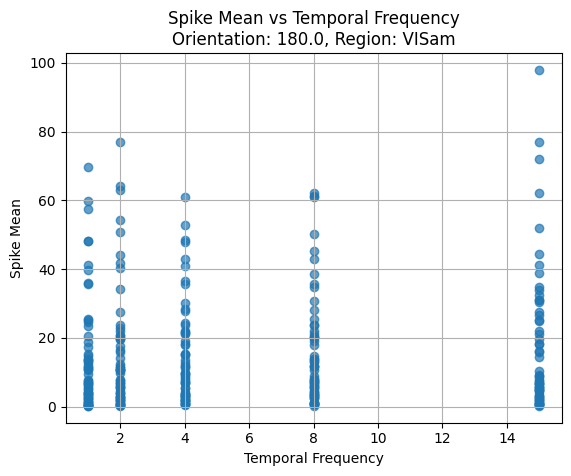

In [45]:
spike_mean_temporal_frequency(session, "VISam", 180.0)

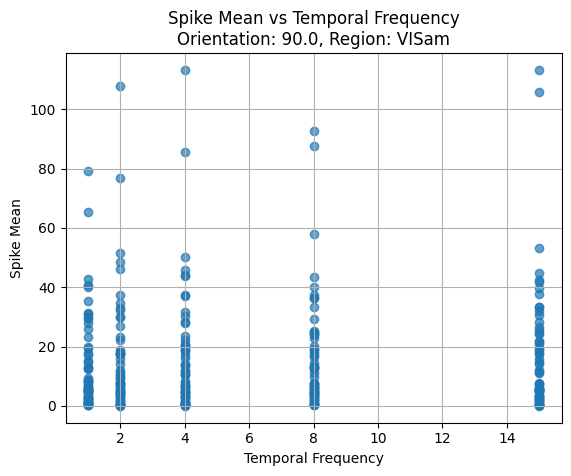

In [48]:
spike_mean_temporal_frequency(session, "VISam", 90.0)

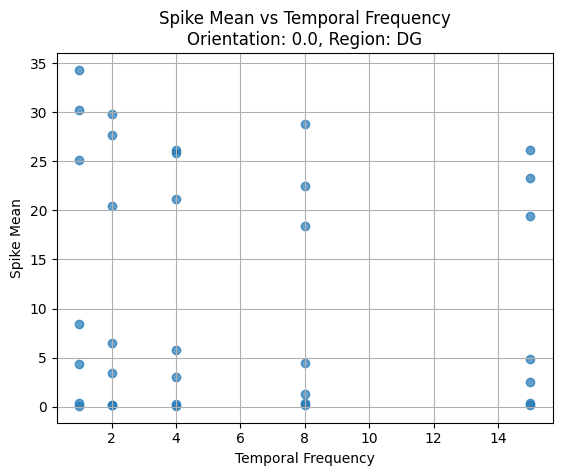

In [33]:
spike_mean_temporal_frequency(session, "DG", 0.0)

Super interesting it seems as if there are some neurons in DG which are activated much more than others by the drifting gratings regardless of the temporal_frequency.

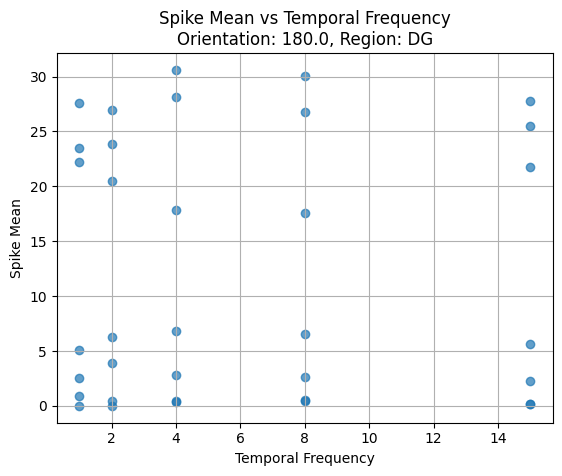

In [34]:
spike_mean_temporal_frequency(session, "DG", 180.0)

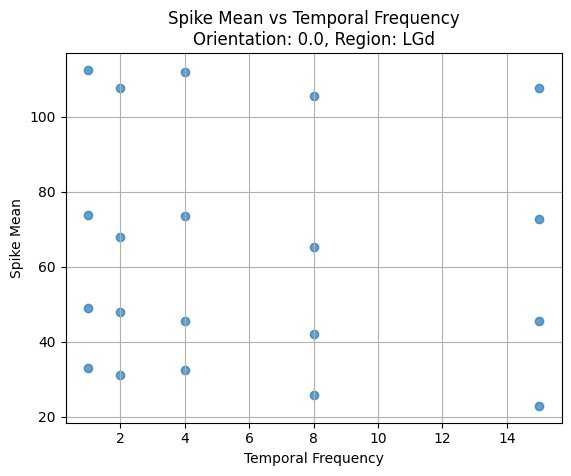

In [52]:
spike_mean_temporal_frequency(session, "LGd", 0.0)

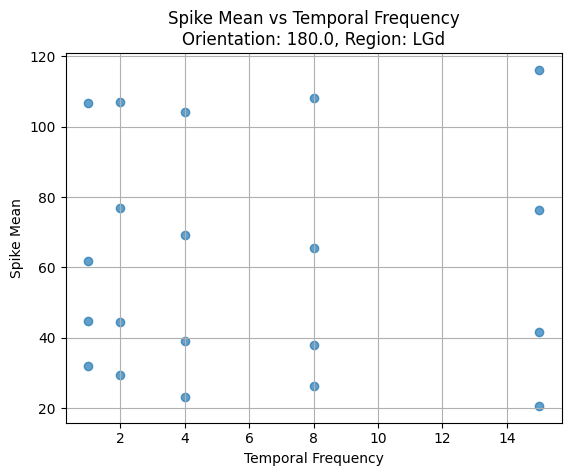

In [53]:
spike_mean_temporal_frequency(session, "LGd", 180.0)

### Now the CV across temporal frequencies

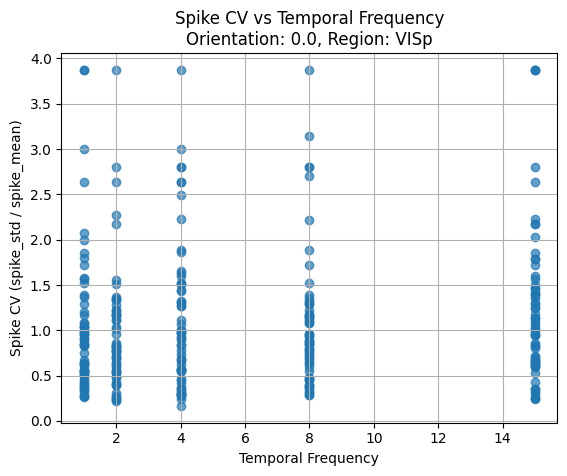

In [46]:
def spike_cv_temporal_frequency(session, region, orientation):
    """
    Function returns a scatter plot of the spike_CV's of units in a specified region
    for a specified orientation of drifting gratings, plotted against various temporal_frequencies.

    spike_CV is computed as spike_std / spike_mean.
    
    Parameters
    ----------
    session:
        Session object.
    region: str
        Brain region acronym (e.g., 'VISp', 'VISam', 'DG').
    orientation: float or int
        The orientation value for drifting gratings to filter by (e.g., 0.0, 90.0).
    """

    # Filter stimulus presentations for drifting gratings
    stimulus_presentations = session.stimulus_presentations
    drifting_stimulus_presentations = stimulus_presentations[
        stimulus_presentations['stimulus_name'] == 'drifting_gratings'
    ]
    
    # Further filter by the specified orientation
    drifting_orientation = drifting_stimulus_presentations[
        drifting_stimulus_presentations['orientation'] == orientation
    ]
    
    # Retrieve spike counts for drifting gratings from the specified region
    drifting_spike_counts = get_spike(session, stimuli="drifting_gratings",
                                      ecephys_structure_acronym=region)
    
    # Determine the linking column for spike counts:
    if 'stimulus_condition_id' in drifting_spike_counts.columns:
        link_column = 'stimulus_condition_id'
    elif 'stimulus_presentation_id' in drifting_spike_counts.columns:
        link_column = 'stimulus_presentation_id'
    else:
        if drifting_spike_counts.index.names and 'stimulus_condition_id' in drifting_spike_counts.index.names:
            link_column = 'stimulus_condition_id'
            drifting_spike_counts = drifting_spike_counts.reset_index(level=link_column)
        elif drifting_spike_counts.index.names and 'stimulus_presentation_id' in drifting_spike_counts.index.names:
            link_column = 'stimulus_presentation_id'
            drifting_spike_counts = drifting_spike_counts.reset_index(level=link_column)
        else:
            raise ValueError("Neither 'stimulus_condition_id' nor 'stimulus_presentation_id' found in spike counts.")

    # Determine the linking column for drifting_orientation:
    if 'stimulus_condition_id' in drifting_orientation.columns:
        mapping_col = 'stimulus_condition_id'
    elif 'stimulus_presentation_id' in drifting_orientation.columns:
        mapping_col = 'stimulus_presentation_id'
    else:
        if drifting_orientation.index.names and 'stimulus_condition_id' in drifting_orientation.index.names:
            mapping_col = 'stimulus_condition_id'
            drifting_orientation = drifting_orientation.reset_index(level=mapping_col)
        elif drifting_orientation.index.names and 'stimulus_presentation_id' in drifting_orientation.index.names:
            mapping_col = 'stimulus_presentation_id'
            drifting_orientation = drifting_orientation.reset_index(level=mapping_col)
        else:
            raise ValueError("Neither 'stimulus_condition_id' nor 'stimulus_presentation_id' found in stimulus presentations.")

    # Create a mapping from the linking column to temporal_frequency
    freq_mapping = (
        drifting_orientation[[mapping_col, 'temporal_frequency']]
        .drop_duplicates()
        .set_index(mapping_col)['temporal_frequency']
        .to_dict()
    )

    # Add the temporal_frequency column to drifting_spike_counts
    drifting_spike_counts['temporal_frequency'] = drifting_spike_counts[link_column].map(freq_mapping)
    
    # Drop rows that didn't get a temporal_frequency mapped (if any)
    drifting_spike_counts = drifting_spike_counts.dropna(subset=['temporal_frequency'])
    
    # Compute spike_CV = spike_std / spike_mean
    drifting_spike_counts['spike_CV'] = drifting_spike_counts['spike_std'] / drifting_spike_counts['spike_mean']
    
    # Create a scatter plot of spike_CV vs. temporal_frequency
    plt.figure()
    plt.scatter(drifting_spike_counts['temporal_frequency'], drifting_spike_counts['spike_CV'], alpha=0.7)
    plt.xlabel('Temporal Frequency')
    plt.ylabel('Spike CV (spike_std / spike_mean)')
    plt.title(f"Spike CV vs Temporal Frequency\nOrientation: {orientation}, Region: {region}")
    plt.grid(True)
    plt.show()

spike_cv_temporal_frequency(session, 'VISp', 0.0)

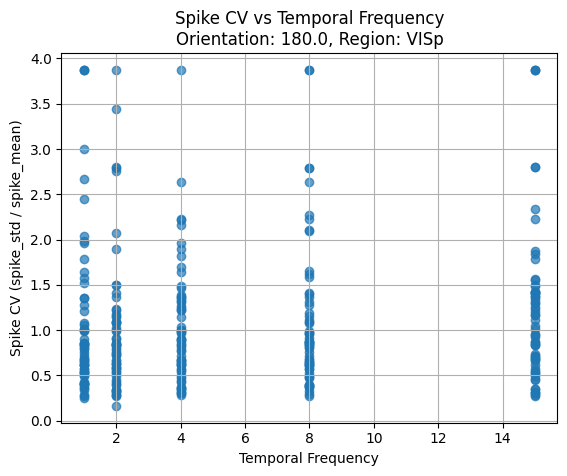

In [47]:
spike_cv_temporal_frequency(session, 'VISp', 180.0)

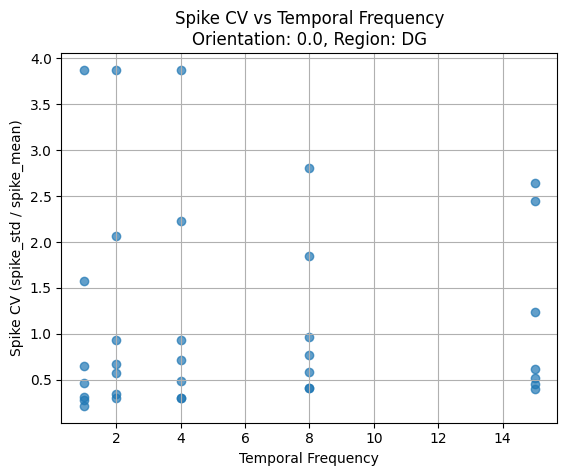

In [49]:
spike_cv_temporal_frequency(session, 'DG', 0.0)

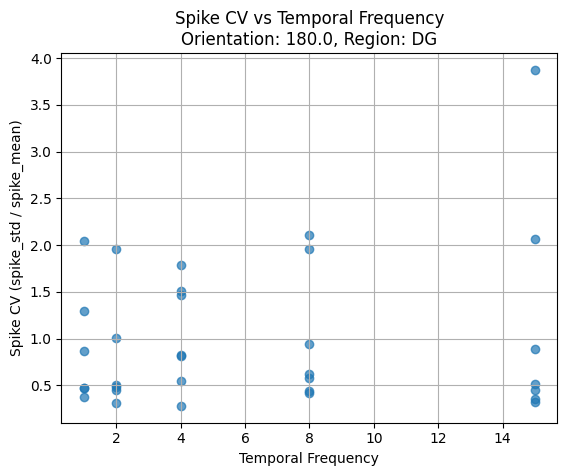

In [50]:
spike_cv_temporal_frequency(session, 'DG', 180.0)

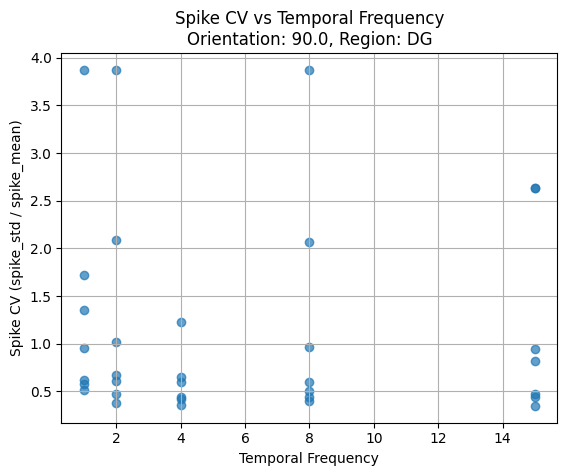

In [51]:
spike_cv_temporal_frequency(session, 'DG', 90.0)

### Depressing initial results

These plots show there are no clear differences in spike_means or spike_cv of units between temporal frequencies of the drifting gratings in all regions looked at above. 

Moreover, changing the orientation also doesn't seem to produce different results. If we are going to be able to decode it won't be as easy as looking at general overall data such as mean spike count per presentation. 

### Spike trains of individual neurons 

As we ultimately want to be able to decode the stimulus from the neural response.

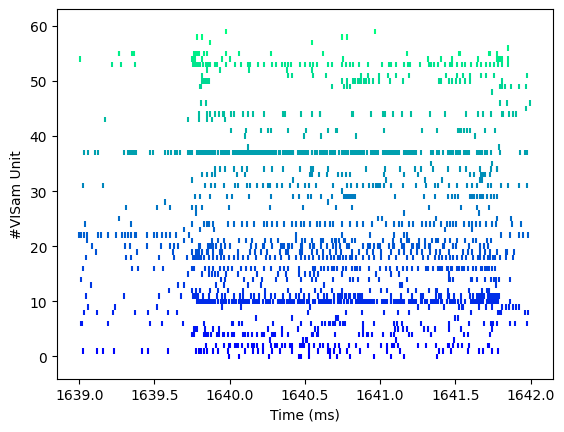

In [35]:
def get_spikes_in_time_interval(session, region, time_start, time_end):
    #Filter neurons in the desired region
    #IDs of these neuron are set as the indices of the units table
    region_ids = session.units[session.units["ecephys_structure_acronym"]==region].index.values

    #Get the spike times as a list of numpy arrays instead of dictionary
    #spike_times[id] is a numpy array
    region_spikes = []
    for id in region_ids:
        #Filter spikes in the interval (time_start, time_end) ms.
        #A single neuron can have 20000 spikes, and eventplot would struggle
        spikes = session.spike_times[id]
        region_spikes.append(spikes[(spikes > time_start) & (spikes < time_end)])

    return region_spikes 

plt.figure()

#Cool colors from the colormap, one per each neuron
#visam_spikes = get_spikes_in_time_interval(session, "VISam", 1595, 1597) #Temporal freq of 2
visam_spikes = get_spikes_in_time_interval(session, "VISam", 1639, 1642) #Temporal freq of 15
cmap = matplotlib.colormaps.get_cmap("winter")
unitcolors = [cmap(x) for x in np.linspace(0,1,len(visam_spikes))] 

#Do the eventplot!
plt.eventplot(visam_spikes, orientation="horizontal", color=unitcolors)
plt.xlabel("Time (ms)")
plt.ylabel("#VISam Unit")
plt.show()

del visam_spikes #Free unused memory

This is the raster plot for Visam units over a very small time intervel in which they are exposed to drifting gratings at temporal frequency of 15. The stimulus kicks in at 1639.692928. You see the immediate increased activity of most units.

Time to look at an individual unit. I will choose one from VISam. ID - 951819523

In [36]:
unit_spikes = session.spike_times[951819523]
unit_spikes.shape

(16618,)

In [37]:
unit_spikes[:5]

array([18.1475821 , 26.82542448, 46.25284473, 46.41501157, 46.42607825])

In [38]:
unit_spike_amplitudes = session.spike_amplitudes[951819523]